# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import citipy
print("citipy successfully imported!")

citipy successfully imported!


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# List of cities to be used in the script (replace this with your actual list of cities)
#cities = ["avarua", "inhambane", "zhezqazghan", "hluti", "varzea da palma", "kataragama", "aasiaat"]

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Check if the city was found before accessing data
        if city_weather['cod'] == 200:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City {city} not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred: {e}. Skipping city {city}...")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Example of accessing city_data
for data in city_data:
    print(data)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | yuzhno-kurilsk
Processing Record 3 of Set 1 | smara
Processing Record 4 of Set 1 | greenwood
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | beledweyne
Processing Record 7 of Set 1 | kailua-kona
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | copiapo
Processing Record 10 of Set 1 | nueva guinea
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | zemio
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | linxia chengguanzhen
Processing Record 15 of Set 1 | puerto san carlos
City puerto san carlos not found. Skipping...
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | aflou
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | iqaluit
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-10.57,76,42,6.12,GS,1719273901
1,yuzhno-kurilsk,44.0306,145.8556,10.81,99,100,3.23,RU,1719273845
2,smara,26.7384,-11.6719,19.68,78,0,5.30,EH,1719273903
3,greenwood,34.1668,-82.1165,32.93,41,14,2.99,US,1719273905
4,adamstown,-25.0660,-130.1015,22.70,87,56,6.64,PN,1719273906


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-10.57,76,42,6.12,GS,1719273901
1,yuzhno-kurilsk,44.0306,145.8556,10.81,99,100,3.23,RU,1719273845
2,smara,26.7384,-11.6719,19.68,78,0,5.30,EH,1719273903
3,greenwood,34.1668,-82.1165,32.93,41,14,2.99,US,1719273905
4,adamstown,-25.0660,-130.1015,22.70,87,56,6.64,PN,1719273906


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

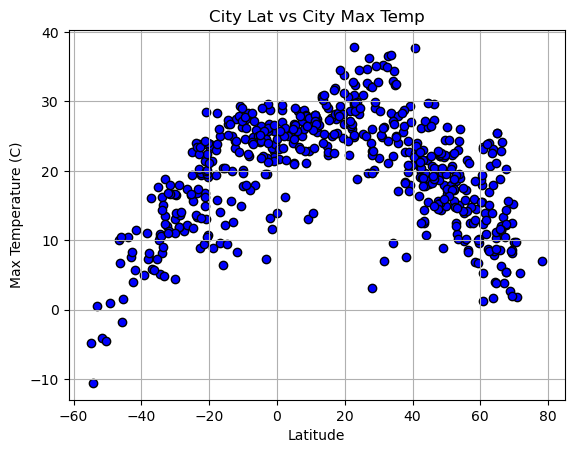

In [19]:
# Build scatter plot for latitude vs. temperature
val_x = city_data_df["Lat"]
val_y_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(val_x, val_y_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Lat vs City Max Temp")
plt.grid()
           
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

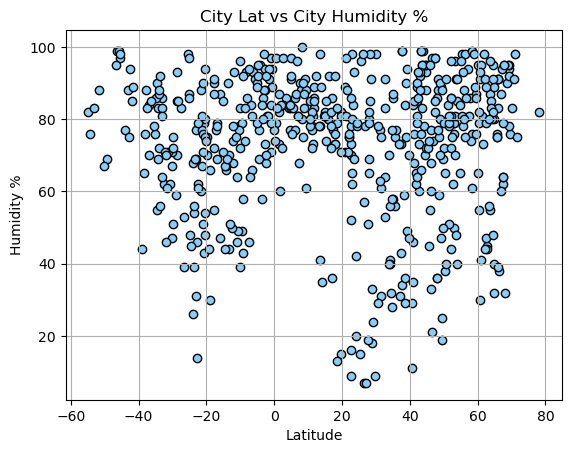

In [20]:
# Build the scatter plots for latitude vs. humidity
val_x = city_data_df["Lat"]
val_y_humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(val_x, val_y_humidity, marker="o", facecolors = 'lightskyblue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Lat vs City Humidity %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

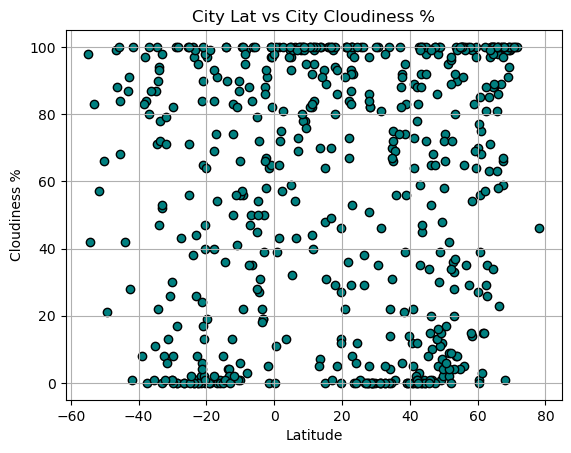

In [21]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors = 'teal', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Lat vs City Cloudiness %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

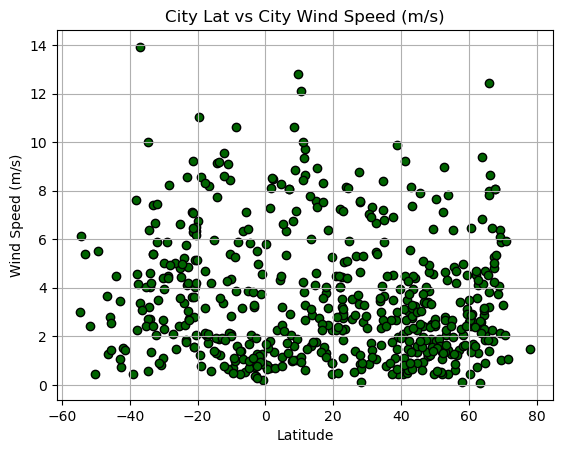

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors = 'darkgreen', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Lat vs City Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Perform a linear regression on temperture vs. latitude
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.148981
1      3.347249
2      3.488267
3      3.427689
4      3.910732
         ...   
558    3.451810
559    3.633477
560    3.555975
561    3.355722
562    3.705096
Name: Lat, Length: 563, dtype: float64


In [41]:
# Define a function to create Linear Regression plots
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.01x + 3.71


In [42]:
def plot_function(x,y,location,dog):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Incorporate the other graph properties
    plt.scatter(x, y, marker="o", facecolors = 'blue', edgecolors = 'black')
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color='red')
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (C)")
    plt.title(dog)
    print(f"The r-value is:{rvalue}")
    plt.grid()

    # Show plot
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yuzhno-kurilsk,44.0306,145.8556,10.81,99,100,3.23,RU,1719273845
2,smara,26.7384,-11.6719,19.68,78,0,5.30,EH,1719273903
3,greenwood,34.1668,-82.1165,32.93,41,14,2.99,US,1719273905
5,beledweyne,4.7358,45.2036,24.08,77,99,8.29,SO,1719273907
6,kailua-kona,19.6406,-155.9956,26.82,82,13,0.89,US,1719273672


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-10.57,76,42,6.12,GS,1719273901
4,adamstown,-25.0660,-130.1015,22.70,87,56,6.64,PN,1719273906
8,copiapo,-27.3667,-70.3333,11.35,83,43,2.08,CL,1719273756
10,geraldton,-28.7667,114.6000,11.91,70,0,4.48,AU,1719273914
12,waitangi,-43.9535,-176.5597,10.46,77,42,4.47,NZ,1719273917


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6600522499236265


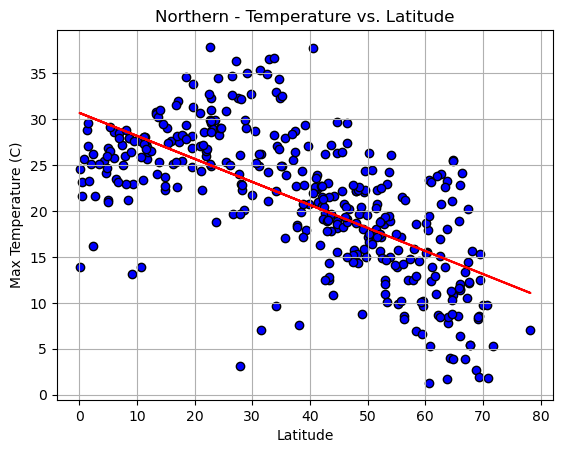

In [50]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(1,-20),"Northern - Temperature vs. Latitude")

The r-value is:0.768038494111685


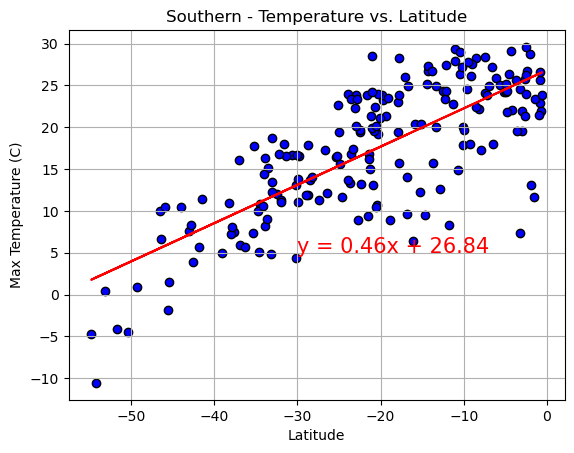

In [56]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(-30,5),"Southern - Temperature vs. Latitude")

**Discussion about the linear relationship:** 
Northern Hemisphere the r-value of -0.66 indicates a moderate negative correlation between latitude and maximum temperature. Southern Hemisphere the r-value of 0.77 indicates a strong positive correlation between latitude and maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.46023452932965464


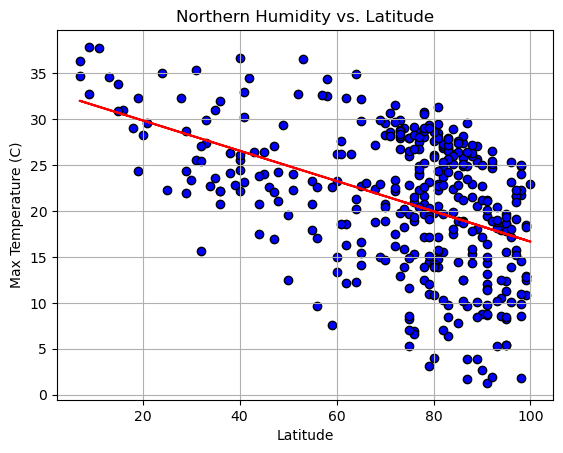

In [54]:
# Northern Hemisphere
x=northern_hemi_df["Humidity"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(20,-25),"Northern Humidity vs. Latitude")

The r-value is:-0.07461990735829264


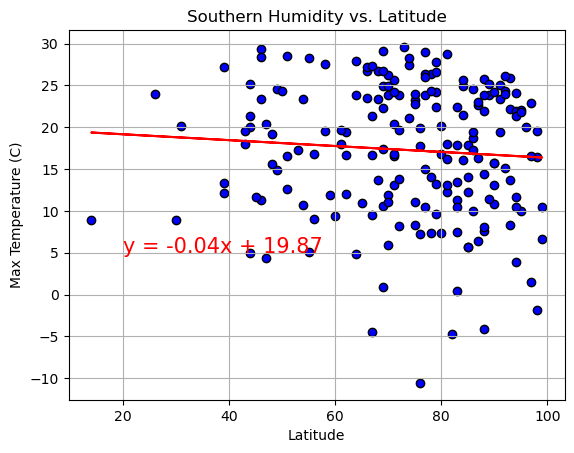

In [55]:
# Southern Hemisphere
x=southern_hemi_df["Humidity"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(20,5),"Southern Humidity vs. Latitude")

**Discussion about the linear relationship:** Northern Hemisphere the r-value of -0.46 indicates a moderate negative correlation between latitude and humidity. Southern Hemisphere the r-value of -0.75 indicates a negative correlation between latitude and maximum temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.22912449357906559


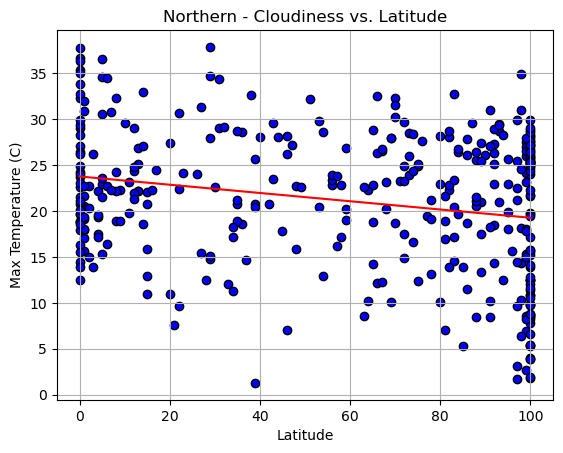

In [57]:
# Northern Hemisphere
x=northern_hemi_df["Cloudiness"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(0,-30),"Northern - Cloudiness vs. Latitude")

The r-value is:0.11650021032128623


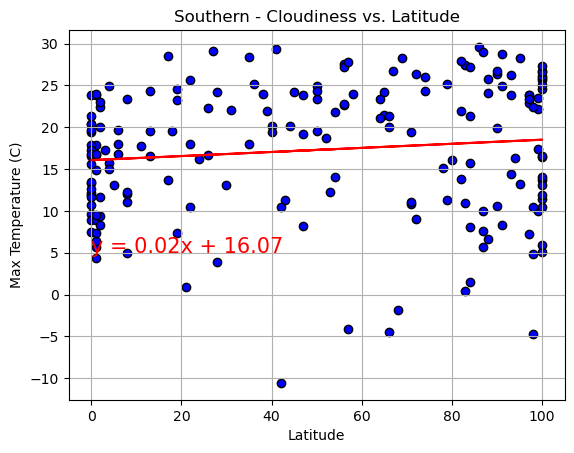

In [58]:
# Southern Hemisphere
x=southern_hemi_df["Cloudiness"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(0,5),"Southern - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** : Northern Hemisphere the r-value of -0.23 indicates a moderate negative correlation between latitude and cloudiness. Southern Hemisphere the r-value of -0.12 indicates a weak correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.09323138881231648


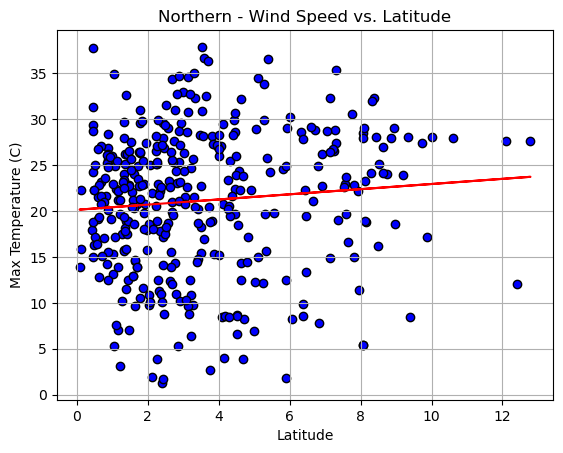

In [60]:
# Northern Hemisphere
x=northern_hemi_df["Wind Speed"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(8,-30),"Northern - Wind Speed vs. Latitude")

The r-value is:0.11650021032128623


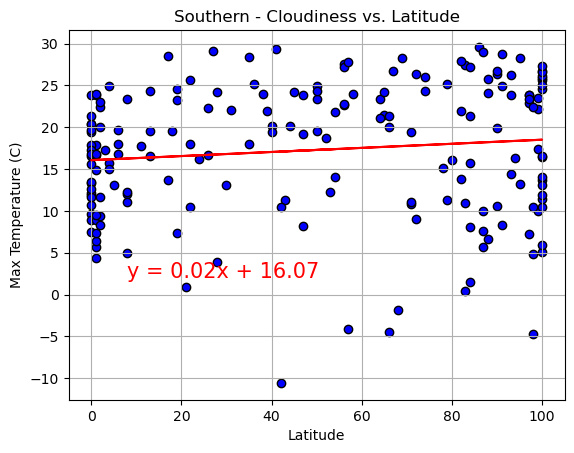

In [61]:
# Southern Hemisphere
x=southern_hemi_df["Cloudiness"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(8,2),"Southern - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** Northern Hemisphere the r-value of 0.09 indicates a moderate positive correlation between latitude and wind speed. Southern Hemisphere the r-value of 0.12 indicates slight positive correlation between latitude and speed.